In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from PIL import Image, ImageDraw
import random

class ShapesDataset(Dataset):
    def __init__(self, num_images, transform=None):
        """
        Initializes the dataset.

        Parameters:
        - num_images: Integer specifying the number of images in the dataset.
        - transform: Optional torchvision transforms to apply to the images.
        """
        self.num_images = num_images
        self.shapes = ['triangle', 'circle', 'square']
        self.canvas_size = 64
        self.transform = transform
        self.shape_to_idx = {'triangle': 0, 'circle': 1, 'square': 2}

    def __len__(self):
        return self.num_images

    def draw_shape_on_image(self, img, shape, location, color=None):
        """
        Draws a specified shape at a given location on the provided image.

        Parameters:
        - img: PIL Image object to draw on.
        - shape: String specifying the shape ('triangle', 'circle', 'square').
        - location: Tuple (x, y) specifying the location of the shape's center.

        Returns:
        - img: PIL Image object with the shape drawn on it.
        """
        draw = ImageDraw.Draw(img)
        x, y = location

        if shape == 'circle':
            r = 8  # Radius
            leftUpPoint = (x - r, y - r)
            rightDownPoint = (x + r, y + r)
            draw.ellipse([leftUpPoint, rightDownPoint], fill='black')

        elif shape == 'square':
            s = 16  # Side length
            leftUpPoint = (x - s // 2, y - s // 2)
            rightDownPoint = (x + s // 2, y + s // 2)
            draw.rectangle([leftUpPoint, rightDownPoint], fill='black')

        elif shape == 'triangle':
            s = 16  # Side length
            h = s * (3 ** 0.5) / 2  # Height of the equilateral triangle
            point1 = (x, y - h / 3)
            point2 = (x - s / 2, y + h * 2 / 3)
            point3 = (x + s / 2, y + h * 2 / 3)
            draw.polygon([point1, point2, point3], fill='black')

        else:
            raise ValueError("Shape must be 'triangle', 'circle', or 'square'.")

        return img

    def __getitem__(self, idx):
        """
        Generates one image and its labels.

        Parameters:
        - idx: Index of the image (not used as images are generated on-the-fly).

        Returns:
        - img: Tensor representing the image.
        - labels: Dictionary containing the shapes and locations of the objects.
        """
        # Create a blank image
        img = Image.new('RGB', (self.canvas_size, self.canvas_size), 'white')

        # Randomly select two shapes
        shape1 = random.choice(self.shapes)
        shape2 = random.choice(self.shapes)

        # Randomly select locations
        x1 = random.randint(0, self.canvas_size)
        y1 = random.randint(0, self.canvas_size)
        x2 = random.randint(0, self.canvas_size)
        y2 = random.randint(0, self.canvas_size)

        # Randomly decide drawing order to allow overlapping
        if random.random() < 0.5:
            img = self.draw_shape_on_image(img, shape1, (x1, y1))
            img = self.draw_shape_on_image(img, shape2, (x2, y2))
            shapes_order = [shape1, shape2]
            locations_order = [(x1, y1), (x2, y2)]
        else:
            img = self.draw_shape_on_image(img, shape2, (x2, y2))
            img = self.draw_shape_on_image(img, shape1, (x1, y1))
            shapes_order = [shape2, shape1]
            locations_order = [(x2, y2), (x1, y1)]

        # Apply transforms if any
        if self.transform:
            img = self.transform(img)
        else:
            img = transforms.ToTensor()(img)

        # Encode labels
        labels = {
            'shape1': self.shape_to_idx[shapes_order[0]],
            'location1': torch.tensor(locations_order[0], dtype=torch.float32),
            'shape2': self.shape_to_idx[shapes_order[1]],
            'location2': torch.tensor(locations_order[1], dtype=torch.float32)
        }

        return img, labels


Images batch shape: torch.Size([16, 3, 64, 64])
Labels batch: {'shape1': tensor([0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1]), 'location1': tensor([[17., 64.],
        [48., 36.],
        [50., 40.],
        [20., 25.],
        [13., 37.],
        [26., 47.],
        [ 4., 63.],
        [16., 59.],
        [56., 26.],
        [ 3., 20.],
        [59., 64.],
        [31.,  9.],
        [52.,  0.],
        [15., 15.],
        [58., 60.],
        [58., 21.]]), 'shape2': tensor([1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0]), 'location2': tensor([[48., 37.],
        [ 5.,  0.],
        [27., 16.],
        [38.,  9.],
        [57., 10.],
        [13., 14.],
        [55., 18.],
        [40., 24.],
        [53., 23.],
        [ 0., 11.],
        [42., 22.],
        [51., 47.],
        [ 8., 26.],
        [ 9., 29.],
        [32., 38.],
        [ 5.,  7.]])}


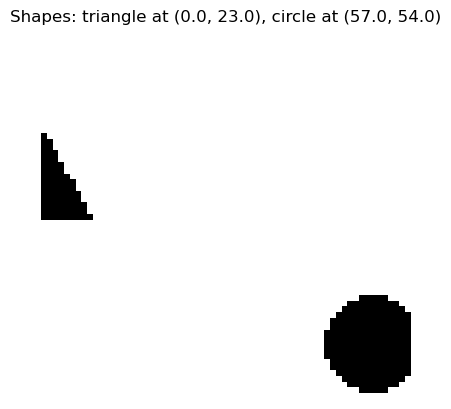

In [10]:

# Example usage:
if __name__ == '__main__':
    # Define any transforms (optional)
    transform = transforms.Compose([
        transforms.ToTensor(),
        # Add more transforms if needed
    ])
    # Create the dataset
    dataset = ShapesDataset(num_images=1000, transform=transform)
    # Create a DataLoader
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
    # Iterate over the DataLoader
    for images, labels in dataloader:
        print(f"Images batch shape: {images.size()}")
        print(f"Labels batch: {labels}")
        break  # Just process one batch for demonstration

    # Display one image and its labels (optional)
    import matplotlib.pyplot as plt
    img, lbl = dataset[0]
    img_np = img.permute(1, 2, 0).numpy()
    plt.imshow(img_np)
    shape_names = {0: 'triangle', 1: 'circle', 2: 'square'}
    plt.title(f"Shapes: {shape_names[lbl['shape1']]} at {tuple(lbl['location1'].numpy())}, "
              f"{shape_names[lbl['shape2']]} at {tuple(lbl['location2'].numpy())}")
    plt.axis('off')
    plt.show()

In [3]:
lbl['shape1']

0